# **Metastatic TBNC & Equity in Healthcare**

Metastatic TNBC is considered the most aggressive TNBC and requires most urgent and timely treatment. Unnecessary delays in diagnosis and subsequent treatment can have devastating effects in these difficult cancers. Differences in the wait time to get treatment is a good proxy for disparities in healthcare access.
The primary goal of building these models is to detect relationships between demographics of the patient with the likelihood of getting timely treatment. The secondary goal is to see if environmental hazards impact proper diagnosis and treatmen Participants will be asked to predict if the patients received metastatic cancer diagnoss within 90 days of screenn w/ '0' = No and '1' = Yes..

This challenge is a binary classification problem that will be solved using logistics regression

# **Data Cleaning of the Data**

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [73]:
df=pd.read_csv('training.csv')

In [74]:
df.head()

patient_id patient_race  payer_type patient_state  patient_zip3  \
0      475714          NaN    MEDICAID            CA           924   
1      349367        White  COMMERCIAL            CA           928   
2      138632        White  COMMERCIAL            TX           760   
3      617843        White  COMMERCIAL            CA           926   
4      817482          NaN  COMMERCIAL            ID           836   

   patient_age patient_gender    bmi breast_cancer_diagnosis_code  \
0           84              F    NaN                       C50919   
1           62              F  28.49                       C50411   
2           43              F  38.09                       C50112   
3           45              F    NaN                       C50212   
4           55              F    NaN                         1749   

                        breast_cancer_diagnosis_desc  ...   disabled  \
0  Malignant neoplasm of unsp site of unspecified...  ...  12.871429   
1  Malig neoplm of upper-outer quadrant of right ...  ...   8.957576   
2  Malignant neoplasm of central portion of left ...  ...  11.253333   
3  Malig neoplasm of upper-inner quadrant of left...  ...   8.845238   
4  Malignant neoplasm of breast (female), unspeci...  ...  15.276000   

     poverty limited_english commute_time health_uninsured    veteran  \
0  22.542857       10.100000    27.814286        11.200000   3.500000   
1  10.109091        8.057576    30.606061         7.018182   4.103030   
2   9.663333        3.356667    31.394915        15.066667   7.446667   
3   8.688095        5.280952    27.561905         4.404762   4.809524   
4  11.224000        1.946000    26.170213        12.088000  13.106000   

       Ozone      PM25        N02  DiagPeriodL90D  
0  52.237210  8.650555  18.606528               1  
1  42.301121  8.487175  20.113179               1  
2  40.108207  7.642753  14.839351               1  
3  42.070075  7.229393  15.894123               0  
4  41.356058  4.110749  11.722197               0  

[5 rows x 83 columns]

In [75]:
df.shape

(12906, 83)

In [76]:
df.dtypes

patient_id          int64
patient_race       object
payer_type         object
patient_state      object
patient_zip3        int64
                   ...   
veteran           float64
Ozone             float64
PM25              float64
N02               float64
DiagPeriodL90D      int64
Length: 83, dtype: object

In [77]:
df.describe()

patient_id  patient_zip3   patient_age          bmi    population  \
count   12906.000000  12906.000000  12906.000000  3941.000000  12905.000000   
mean   547381.196033    573.754300     59.183326    28.984539  20744.441237   
std    260404.959974    275.447534     13.335216     5.696906  13886.903756   
min    100063.000000    101.000000     18.000000    14.000000    635.545455   
25%    321517.000000    331.000000     50.000000    24.660000   9463.896552   
50%    543522.000000    554.000000     59.000000    28.190000  19154.190480   
75%    772671.750000    846.000000     67.000000    32.920000  30021.278690   
max    999896.000000    999.000000     91.000000    85.000000  71374.131580   

            density    age_median  age_under_10  age_10_to_19       age_20s  \
count  12905.000000  12905.000000  12905.000000  12905.000000  12905.000000   
mean    1581.950419     40.502259     11.122784     12.945265     13.290376   
std     2966.305306      4.036963      1.512376      1.923974      3.354103   
min        0.916667     20.600000      0.000000      6.314286      5.925000   
25%      171.857143     37.129825     10.160000     11.741176     11.013415   
50%      700.337500     40.639344     11.039216     12.923944     12.538095   
75%     1666.515385     42.934783     12.190000     14.019767     14.971053   
max    21172.000000     54.570000     17.675000     35.300000     62.100000   

       ...      disabled       poverty  limited_english  commute_time  \
count  ...  12905.000000  12902.000000     12902.000000  12905.000000   
mean   ...     13.335299     13.406950         4.474956     27.978387   
std    ...      3.690949      5.222495         4.837085      5.083939   
min    ...      4.600000      3.433333         0.000000     12.460784   
25%    ...     10.270492      9.663333         0.994444     24.933333   
50%    ...     12.884000     12.177778         2.747222     27.788235   
75%    ...     15.555405     16.635556         5.976000     30.709375   
max    ...     35.155556     38.347826        26.755000     48.020000   

       health_uninsured       veteran         Ozone          PM25  \
count      12905.000000  12905.000000  12877.000000  12877.000000   
mean           8.575284      7.083376     39.822352      7.475221   
std            4.203482      3.109022      3.559492      1.516499   
min            2.440000      1.200000     30.939316      2.636008   
25%            5.618750      4.929688     37.698880      6.651215   
50%            7.465714      6.847059     39.108249      7.686577   
75%           10.617442      8.620000     41.136513      8.276922   
max           27.566102     25.200000     52.237210     11.169408   

                N02  DiagPeriodL90D  
count  12877.000000    12906.000000  
mean      16.098988        0.624516  
std        5.842501        0.484266  
min        2.760371        0.000000  
25%       11.280694        0.000000  
50%       15.589148        1.000000  
75%       20.801880        1.000000  
max       31.504775        1.000000  

[8 rows x 72 columns]

In [78]:
df.describe(include='object')

patient_race  payer_type patient_state patient_gender  \
count          6521       11103         12855          12906   
unique            5           3            50              1   
top           White  COMMERCIAL            CA              F   
freq           3588        6032          2438          12906   

       breast_cancer_diagnosis_code  \
count                         12906   
unique                           50   
top                            1749   
freq                           1982   

                             breast_cancer_diagnosis_desc  \
count                                               12906   
unique                                                 50   
top     Malignant neoplasm of breast (female), unspeci...   
freq                                                 1982   

       metastatic_cancer_diagnosis_code metastatic_first_novel_treatment  \
count                             12906                               24   
unique                               43                                2   
top                                C773                    PEMBROLIZUMAB   
freq                               7052                               13   

       metastatic_first_novel_treatment_type Region            Division  
count                                     24  12854               12854  
unique                                     1      4                   9  
top                          Antineoplastics  South  East North Central  
freq                                      24   3919                2923

In [79]:
## checking for uniques variable 
categorical_col= df.select_dtypes(include=['object', 'category']).columns

for col in categorical_col:
    unique_var = df[col].unique()
    print(f"Unique variable for {col}: {unique_var}")

Unique variable for patient_race: [nan 'White' 'Other' 'Hispanic' 'Asian' 'Black']
Unique variable for payer_type: ['MEDICAID' 'COMMERCIAL' 'MEDICARE ADVANTAGE' nan]
Unique variable for patient_state: ['CA' 'TX' 'ID' 'NY' 'IL' nan 'MI' 'OR' 'MT' 'KY' 'OH' 'IN' 'FL' 'CO' 'GA'
 'VA' 'MD' 'KS' 'WI' 'PA' 'NM' 'WA' 'MN' 'NC' 'AL' 'SC' 'LA' 'IA' 'TN'
 'HI' 'NE' 'AZ' 'MO' 'NV' 'SD' 'DC' 'AR' 'UT' 'WV' 'ND' 'OK' 'WY' 'DE'
 'NJ' 'MS' 'AK' 'PR' 'RI' 'CT' 'NH' 'MA']
Unique variable for patient_gender: ['F']
Unique variable for breast_cancer_diagnosis_code: ['C50919' 'C50411' 'C50112' 'C50212' '1749' 'C50912' 'C50512' '1744'
 'C50412' 'C50812' 'C50911' 'C50312' 'C50311' 'C50111' '1741' 'C5091'
 'C50811' '1748' 'C50511' '1743' 'C50211' 'C50011' 'C5051' 'C50012'
 'C50419' '1742' 'C50611' 'C50612' 'C50119' 'C50819' '1746' 'C5041'
 'C50619' '19881' 'C5081' '1745' 'C50219' 'C50319' 'C50019' 'C50519'
 'C50929' 'C50021' 'C5021' 'C5011' 'C5031' 'C509' 'C50' '1759' 'C5001'
 'C50421']
Unique variable for br

In [80]:
##Checking for missing data
missing_data =df.isnull().sum()
print("Missing data:\n", missing_data)

Missing data:
 patient_id           0
patient_race      6385
payer_type        1803
patient_state       51
patient_zip3         0
                  ... 
veteran              1
Ozone               29
PM25                29
N02                 29
DiagPeriodL90D       0
Length: 83, dtype: int64


In [81]:
## Handling the missing numerical data using median imputation
for col in df.select_dtypes(include=['number']).columns:
    df[col] = df[col].fillna(df[col].median())

In [82]:
### Handling the missing categorical data using mode imputation
for col in df.select_dtypes(include=['object']).columns:
    df[col] =df[col].fillna(df[col].mode()[0])

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12906 entries, 0 to 12905
Data columns (total 83 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   patient_id                             12906 non-null  int64  
 1   patient_race                           12906 non-null  object 
 2   payer_type                             12906 non-null  object 
 3   patient_state                          12906 non-null  object 
 4   patient_zip3                           12906 non-null  int64  
 5   patient_age                            12906 non-null  int64  
 6   patient_gender                         12906 non-null  object 
 7   bmi                                    12906 non-null  float64
 8   breast_cancer_diagnosis_code           12906 non-null  object 
 9   breast_cancer_diagnosis_desc           12906 non-null  object 
 10  metastatic_cancer_diagnosis_code       12906 non-null  object 
 11  me

In [84]:
df.head(10)

patient_id patient_race          payer_type patient_state  patient_zip3  \
0      475714        White            MEDICAID            CA           924   
1      349367        White          COMMERCIAL            CA           928   
2      138632        White          COMMERCIAL            TX           760   
3      617843        White          COMMERCIAL            CA           926   
4      817482        White          COMMERCIAL            ID           836   
5      111545        White  MEDICARE ADVANTAGE            NY           141   
6      914071        White          COMMERCIAL            CA           900   
7      479368        White          COMMERCIAL            IL           619   
8      994014        White  MEDICARE ADVANTAGE            CA           973   
9      155485        White          COMMERCIAL            IL           617   

   patient_age patient_gender    bmi breast_cancer_diagnosis_code  \
0           84              F  28.19                       C50919   
1           62              F  28.49                       C50411   
2           43              F  38.09                       C50112   
3           45              F  28.19                       C50212   
4           55              F  28.19                         1749   
5           66              F  28.19                         1749   
6           51              F  29.05                       C50912   
7           60              F  28.19                       C50512   
8           82              F  28.19                         1744   
9           64              F  28.19                       C50912   

                        breast_cancer_diagnosis_desc  ...   disabled  \
0  Malignant neoplasm of unsp site of unspecified...  ...  12.871429   
1  Malig neoplm of upper-outer quadrant of right ...  ...   8.957576   
2  Malignant neoplasm of central portion of left ...  ...  11.253333   
3  Malig neoplasm of upper-inner quadrant of left...  ...   8.845238   
4  Malignant neoplasm of breast (female), unspeci...  ...  15.276000   
5  Malignant neoplasm of breast (female), unspeci...  ...  13.717143   
6  Malignant neoplasm of unspecified site of left...  ...  11.901538   
7  Malig neoplasm of lower-outer quadrant of left...  ...  15.260000   
8  Malignant neoplasm of upper-outer quadrant of ...  ...  19.371875   
9  Malignant neoplasm of unspecified site of left...  ...  11.816981   

     poverty limited_english commute_time health_uninsured    veteran  \
0  22.542857       10.100000    27.814286        11.200000   3.500000   
1  10.109091        8.057576    30.606061         7.018182   4.103030   
2   9.663333        3.356667    31.394915        15.066667   7.446667   
3   8.688095        5.280952    27.561905         4.404762   4.809524   
4  11.224000        1.946000    26.170213        12.088000  13.106000   
5   8.888235        0.638235    25.000000         4.797143   7.745714   
6  20.760000       14.737500    30.709375        10.341538   3.030769   
7  10.890000        0.503333    24.275862         8.753333   7.506667   
8  14.593651        1.620968    26.015254         6.645313  10.955385   
9   8.443396        0.190566    23.843396         4.684906   9.016981   

       Ozone       PM25        N02  DiagPeriodL90D  
0  52.237210   8.650555  18.606528               1  
1  42.301121   8.487175  20.113179               1  
2  40.108207   7.642753  14.839351               1  
3  42.070075   7.229393  15.894123               0  
4  41.356058   4.110749  11.722197               0  
5  40.107248   6.181812  13.562528               0  
6  41.186992  11.166898  21.644261               1  
7  37.646770   7.295977  12.914805               1  
8  36.323573   4.744352  10.439314               0  
9  37.773830   7.299998  14.942968               1  

[10 rows x 83 columns]

In [85]:
###Checking for duplicates
duplicates = df.duplicated().sum()
print("Number of Duplicate:", duplicates)

Number of Duplicate: 0


In [86]:
## Checking for Invalid entries for 
invalid_entries=df[df.select_dtypes(include=['number'])<0].count()
print("Invalid Entries:\n", invalid_entries)

Invalid Entries:
 patient_id        0
patient_race      0
payer_type        0
patient_state     0
patient_zip3      0
                 ..
veteran           0
Ozone             0
PM25              0
N02               0
DiagPeriodL90D    0
Length: 83, dtype: int64


In [87]:
### Correlaton MAtrix
num_columns=df.select_dtypes(include=np.number).columns
correlation_matrix=df[num_columns].corr()
correlation_matrix

patient_id  patient_zip3  patient_age       bmi  population  \
patient_id        1.000000      0.020582     0.008109 -0.003337    0.001227   
patient_zip3      0.020582      1.000000    -0.062820 -0.025671    0.098974   
patient_age       0.008109     -0.062820     1.000000 -0.034802   -0.018034   
bmi              -0.003337     -0.025671    -0.034802  1.000000   -0.016984   
population        0.001227      0.098974    -0.018034 -0.016984    1.000000   
...                    ...           ...          ...       ...         ...   
veteran          -0.004940      0.038641     0.002477  0.016266   -0.500772   
Ozone            -0.007319      0.389640    -0.025823 -0.011100    0.081526   
PM25              0.011330     -0.066421    -0.023035  0.002564    0.385093   
N02               0.004651     -0.073817     0.014863 -0.020251    0.672276   
DiagPeriodL90D    0.002405      0.036372     0.055634 -0.009052   -0.006564   

                 density  age_median  age_under_10  age_10_to_19   age_20s  \
patient_id     -0.007391    0.005048     -0.004158     -0.018010 -0.003950   
patient_zip3   -0.196645   -0.148137      0.057009      0.032373  0.095152   
patient_age    -0.002501    0.040115     -0.026525     -0.029744 -0.020594   
bmi            -0.002892   -0.014548      0.033054      0.006663  0.002973   
population      0.730978   -0.550534      0.254734      0.000770  0.437071   
...                  ...         ...           ...           ...       ...   
veteran        -0.490775    0.346022     -0.169988     -0.077042 -0.115528   
Ozone          -0.124889   -0.053309     -0.036422      0.068285  0.058885   
PM25            0.199229   -0.462487      0.263498      0.201455  0.317203   
N02             0.578586   -0.486529      0.176122     -0.014526  0.410497   
DiagPeriodL90D -0.017256   -0.000408     -0.008980     -0.015170  0.003455   

                ...  disabled   poverty  limited_english  commute_time  \
patient_id      ...  0.008590  0.011715         0.015854      0.002057   
patient_zip3    ... -0.122074 -0.043869         0.204556     -0.158597   
patient_age     ...  0.015372  0.000199        -0.028139     -0.034830   
bmi             ...  0.042888  0.036464        -0.011799     -0.022574   
population      ... -0.533188  0.102812         0.671432      0.471734   
...             ...       ...       ...              ...           ...   
veteran         ...  0.408566 -0.099291        -0.493024     -0.373883   
Ozone           ... -0.004765  0.011108         0.061081     -0.014967   
PM25            ... -0.217214  0.198929         0.331380      0.137092   
N02             ... -0.531627  0.002540         0.427383      0.338445   
DiagPeriodL90D  ... -0.020363 -0.024755        -0.011355     -0.027370   

                health_uninsured   veteran     Ozone      PM25       N02  \
patient_id              0.017466 -0.004940 -0.007319  0.011330  0.004651   
patient_zip3            0.139950  0.038641  0.389640 -0.066421 -0.073817   
patient_age            -0.036234  0.002477 -0.025823 -0.023035  0.014863   
bmi                     0.036598  0.016266 -0.011100  0.002564 -0.020251   
population              0.057858 -0.500772  0.081526  0.385093  0.672276   
...                          ...       ...       ...       ...       ...   
veteran                 0.080999  1.000000  0.120174 -0.403779 -0.475722   
Ozone                  -0.029134  0.120174  1.000000 -0.136977  0.055731   
PM25                    0.222166 -0.403779 -0.136977  1.000000  0.285006   
N02                    -0.173699 -0.475722  0.055731  0.285006  1.000000   
DiagPeriodL90D         -0.028537 -0.001023  0.007877 -0.016483  0.000763   

                DiagPeriodL90D  
patient_id            0.002405  
patient_zip3          0.036372  
patient_age           0.055634  
bmi                  -0.009052  
population           -0.006564  
...                        ...  
veteran              -0.001023  
Ozone                 0.007877  
PM25                 -0.016483 

In [88]:
### Dropping the id columsn
df_0 = df.drop(["patient_id"], axis = 1)

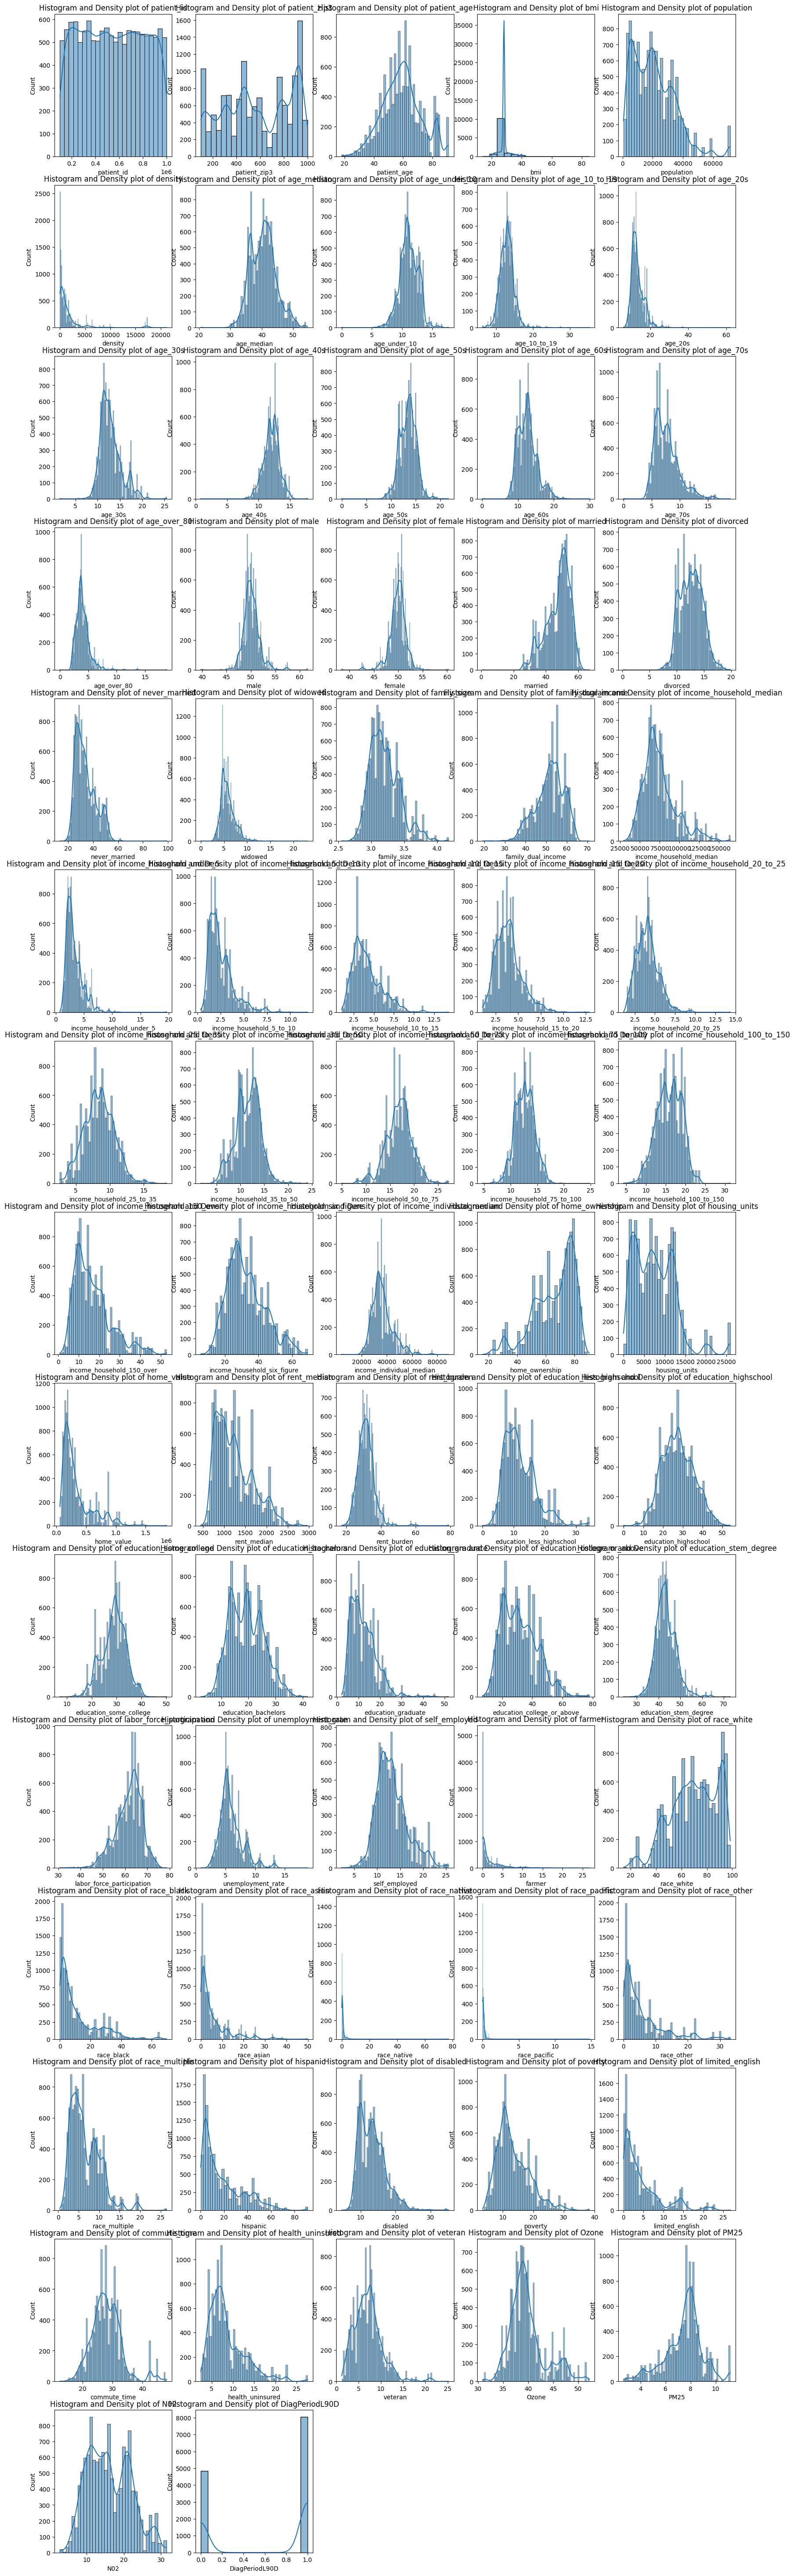

In [89]:
### Plotting a histogram 
numerical_cols = df.select_dtypes(include=['number']).columns
num_cols = 5  # Number of columns in the grid
num_rows = -(-len(numerical_cols) // num_cols)  # Ceiling division to calculate number of rows

# Creating subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5*num_rows))

# Flattening the axes
if num_rows == 1:
    axes = [axes]

# Plotting the  histograms
for i, col in enumerate(numerical_cols):
    row_index = i // num_cols  # Calculating row index
    col_index = i % num_cols   # Calculating column index
    sns.histplot(df[col], kde=True, ax=axes[row_index][col_index])
    axes[row_index][col_index].set_title(f"Histogram and Density plot of {col}")

# Removing empty subplots
for i in range(len(numerical_cols), num_rows * num_cols):
    row_index = i // num_cols
    col_index = i % num_cols
    fig.delaxes(axes[row_index][col_index])

In [90]:
### Handling the Outliers 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Listing all the numeric columns except  the target variable
target_var = "DiagPeriodL90D"
numeric_cols = df_0.select_dtypes(include=['number']).columns
numeric_cols = [col for col in numeric_cols if col != target_var]

### Listing the obj columns
obj_cols = df_0.select_dtypes(include=['object']).columns

# Separating the target variable from numeric features
X_num = df_0[numeric_cols]  # numeric Features
X_obj = df_0[obj_cols]     # obj features 
y_target = df_0[target_var]     # Target variable

# Applying  StandardScaler to the numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_num)

# Turning the scaled data back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X_num.columns)

# Combining the scaled num features with the target variable
df_scaled = pd.concat([X_scaled_df,X_obj,  y_target], axis=1)

In [91]:
df_scaled.shape

(12906, 82)

In [92]:
### One Hot Encoding

### Listing out the categorical variables
categorical_cols = df_scaled.select_dtypes(exclude=['number']).columns
print("Number of categorical columns:", len(categorical_cols))
print("Categorical column names:", categorical_cols)

Number of categorical columns: 11
Categorical column names: Index(['patient_race', 'payer_type', 'patient_state', 'patient_gender',
       'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc',
       'metastatic_cancer_diagnosis_code', 'metastatic_first_novel_treatment',
       'metastatic_first_novel_treatment_type', 'Region', 'Division'],
      dtype='object')


In [93]:
### OneHot Endcoding
ohe = OneHotEncoder(handle_unknown='ignore',
                    sparse_output= False).set_output(transform='pandas')

In [94]:
ohetransform = ohe.fit_transform(df_scaled[['patient_race', 'payer_type', 'patient_state', 'patient_gender',
       'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc',
       'metastatic_cancer_diagnosis_code', 'metastatic_first_novel_treatment',
       'metastatic_first_novel_treatment_type', 'Region', 'Division']])

In [95]:
ohetransform

patient_race_Asian  patient_race_Black  patient_race_Hispanic  \
0                     0.0                 0.0                    0.0   
1                     0.0                 0.0                    0.0   
2                     0.0                 0.0                    0.0   
3                     0.0                 0.0                    0.0   
4                     0.0                 0.0                    0.0   
...                   ...                 ...                    ...   
12901                 0.0                 0.0                    0.0   
12902                 0.0                 0.0                    0.0   
12903                 0.0                 0.0                    0.0   
12904                 0.0                 0.0                    0.0   
12905                 0.0                 0.0                    1.0   

       patient_race_Other  patient_race_White  payer_type_COMMERCIAL  \
0                     0.0                 1.0                    0.0   
1                     0.0                 1.0                    1.0   
2                     0.0                 1.0                    1.0   
3                     0.0                 1.0                    1.0   
4                     0.0                 1.0                    1.0   
...                   ...                 ...                    ...   
12901                 0.0                 1.0                    1.0   
12902                 0.0                 1.0                    1.0   
12903                 0.0                 1.0                    1.0   
12904                 0.0                 1.0                    1.0   
12905                 0.0                 0.0                    0.0   

       payer_type_MEDICAID  payer_type_MEDICARE ADVANTAGE  patient_state_AK  \
0                      1.0                            0.0               0.0   
1                      0.0                            0.0               0.0   
2                      0.0                            0.0               0.0   
3                      0.0                            0.0               0.0   
4                      0.0                            0.0               0.0   
...                    ...                            ...               ...   
12901                  0.0                            0.0               0.0   
12902                  0.0                            0.0               0.0   
12903                  0.0                            0.0               0.0   
12904                  0.0                            0.0               0.0   
12905                  1.0                            0.0               0.0   

       patient_state_AL  ...  Region_West  Division_East North Central  \
0                   0.0  ...          1.0                          0.0   
1                   0.0  ...          1.0                          0.0   
2                   0.0  ...          0.0                          0.0   
3                   0.0  ...          1.0                          0.0   
4                   0.0  ...          1.0                          0.0   
...                 ...  ...          ...                          ...   
12901               0.0  ...          0.0                          1.0   
12902               0.0  ...          1.0                          0.0   
12903               0.0  ...          1.0                          0.0   
12904               0.0  ...          0.0                          0.0   
12905               0.0  ...          0.0                          0.0   

       Division_East South Central  Division_Middle Atlantic  \
0                              0.0                       0.0   
1                              0.0                       0.0   
2                              0.0                       0.0   
3                              0.0                       0.0   
4                              0.0                       0.0   
...                            ...                     

In [96]:
### Combining the One-Hot Encoded data with the rest of the data set
df_encoded = pd.concat([df_scaled, ohetransform], axis=1).drop(columns = ['patient_race', 'payer_type', 'patient_state', 'patient_gender',
       'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc',
       'metastatic_cancer_diagnosis_code', 'metastatic_first_novel_treatment',
       'metastatic_first_novel_treatment_type', 'Region', 'Division'])

In [97]:
### Moving the target to the last columns
target_column_name = 'DiagPeriodL90D'

# Removing the target column from its current position
target_column = df_encoded.pop(target_column_name)

# Reinserting the target column at the end of the DataFrame
df_encoded[target_column_name] = target_column

### Checking the data shape & columns
print(df_encoded.shape)
df_encoded.head()

(12906, 289)


patient_zip3  patient_age       bmi  population   density  age_median  \
0      1.271601     1.861060 -0.076564    0.770096 -0.132268   -2.442474   
1      1.286123     0.211229  0.018107    1.323475  0.240741   -0.570342   
2      0.676183    -1.213625  3.047563    0.090190 -0.322191   -0.643009   
3      1.278862    -1.063640 -0.076564    0.867863  0.105978    0.586912   
4      0.952108    -0.313717 -0.076564   -0.709936 -0.493916    0.736056   

   age_under_10  age_10_to_19   age_20s   age_30s  ...  \
0      3.234570      1.350223  1.289255  0.495660  ...   
1      0.499921      0.212744  0.280271  0.239243  ...   
2      1.260072      0.789090 -0.226203  0.293794  ...   
3     -0.695218     -0.420801 -0.224286 -0.171080  ...   
4     -0.197571      0.535775 -1.132525 -1.074528  ...   

   Division_East North Central  Division_East South Central  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   Division_Middle Atlantic  Division_Mountain  Division_New England  \
0                       0.0                0.0                   0.0   
1                       0.0                0.0                   0.0   
2                       0.0                0.0                   0.0   
3                       0.0                0.0                   0.0   
4                       0.0                1.0                   0.0   

   Division_Pacific  Division_South Atlantic  Division_West North Central  \
0               1.0                      0.0                          0.0   
1               1.0                      0.0                          0.0   
2               0.0                      0.0                          0.0   
3               1.0                      0.0                          0.0   
4               0.0                      0.0                          0.0   

   Division_West South Central  DiagPeriodL90D  
0                          0.0               1  
1                          0.0               1  
2                          1.0               1  
3                          0.0               0  
4                          0.0               0  

[5 rows x 289 columns]

In [98]:
#### Selecting relevant features for my dataset
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import VarianceThreshold

# Removing constant features
constant_filter = VarianceThreshold(threshold=0)
X_filtered = constant_filter.fit_transform(df_encoded)

# Getting  the indices of non-constant features
non_constant_indices = constant_filter.get_support(indices=True)

# Selecting non-constant features from the original Df
X_non_constant = df_encoded.iloc[:, non_constant_indices]

target = df_encoded['DiagPeriodL90D']

# Performing ANOVA
f_scores, p_values = f_classif(X_non_constant, target)

# Creating a dictionary mapping feature names to F-scores and p-values
feature_scores = {col: (f_score, p_value) for col, f_score, p_value in zip(X_non_constant.columns, f_scores, p_values)}

# Filtering features with lower p-values and higher F-scores
selected_features = [col for col, (f_score, p_value) in feature_scores.items() if p_value < 0.05 and f_score > 10 and col!= 'DiagPeriodL90D']

# Printing selected features along with their F-scores and p-values
for col in selected_features:
    f_score, p_value = feature_scores[col]
    print(f"Feature: {col}, F-score = {f_score}, p-value = {p_value}")

Feature: patient_zip3, F-score = 17.093960545841817, p-value = 3.5800263974170406e-05
Feature: patient_age, F-score = 40.06329875544593, p-value = 2.540038154784507e-10
Feature: widowed, F-score = 12.835205264114643, p-value = 0.00034141051125303963
Feature: income_household_25_to_35, F-score = 10.89266805147658, p-value = 0.0009680750352060278
Feature: income_individual_median, F-score = 14.25565833607227, p-value = 0.00016029590721929976
Feature: home_value, F-score = 11.813308029936126, p-value = 0.0005899429050774461
Feature: education_less_highschool, F-score = 16.67946328128737, p-value = 4.4524679939962504e-05
Feature: education_bachelors, F-score = 18.37134820827748, p-value = 1.830899114917719e-05
Feature: education_college_or_above, F-score = 10.930596974401904, p-value = 0.0009484720619858349
Feature: labor_force_participation, F-score = 10.232087105406904, p-value = 0.0013835185279072223
Feature: health_uninsured, F-score = 10.516960284351605, p-value = 0.001185845204531159

/home/maryamajibola_elias/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


In [99]:
#### Putting that relevant data into a data frame
selected_df = df_encoded[selected_features].copy()
selected_df.head()

patient_zip3  patient_age   widowed  income_household_25_to_35  \
0      1.271601     1.861060 -0.891645                   0.788147   
1      1.286123     0.211229 -0.755893                  -1.465571   
2      0.676183    -1.213625 -0.717843                  -0.741509   
3      1.278862    -1.063640 -0.773918                  -1.819833   
4      0.952108    -0.313717 -0.265029                   1.385223   

   income_individual_median  home_value  education_less_highschool  \
0                 -1.459125   -0.298642                   4.134885   
1                  0.581711    1.342716                   0.435655   
2                  0.473317   -0.405619                  -0.229002   
3                  2.296148    2.673057                  -1.196434   
4                 -0.908806   -0.357407                  -0.080399   

   education_bachelors  education_college_or_above  labor_force_participation  \
0            -1.768318                   -1.712318                  -0.015368   
1             0.723471                    0.382940                   0.607304   
2             0.065615                   -0.149375                   0.808826   
3             2.269890                    2.081839                   0.472845   
4            -0.857789                   -1.020416                  -0.695038   

   ...  \
0  ...   
1  ...   
2  ...   
3  ...   
4  ...   

   breast_cancer_diagnosis_desc_Malignant neoplasm of upper-inner quadrant of female breast  \
0                                                0.0                                          
1                                                0.0                                          
2                                                0.0                                          
3                                                0.0                                          
4                                                0.0                                          

   breast_cancer_diagnosis_desc_Malignant neoplasm of upper-outer quadrant of female breast  \
0                                                0.0                                          
1                                                0.0                                          
2                                                0.0                                          
3                                                0.0                                          
4                                                0.0                                          

   breast_cancer_diagnosis_desc_Secondary malignant neoplasm of breast  \
0                                                0.0                     
1                                                0.0                     
2                                                0.0                     
3                                                0.0                     
4                                                0.0                     

   metastatic_cancer_diagnosis_code_C773  \
0                                    0.0   
1                                    1.0   
2                                    1.0   
3                                    1.0   
4                                    1.0   

   metastatic_cancer_diagnosis_code_C779  \
0                                    0.0   
1                                    0.0   
2                                    0.0   
3                                    0.0   
4                                    0.0   

   metastatic_cancer_diagnosis_code_C7951  \
0                                     0.0   
1                                     0.0   
2                                     0.0   
3                                     0.0   
4                                     0.0   

   metastatic_cancer_diagnosis_code_C7981  Region_South  Region_West  \
0                                     0.0           0.0          1.0   
1                                     0.0           0.0          1.0   
2              

In [100]:
print(selected_df.columns)

Index(['patient_zip3', 'patient_age', 'widowed', 'income_household_25_to_35',
       'income_individual_median', 'home_value', 'education_less_highschool',
       'education_bachelors', 'education_college_or_above',
       'labor_force_participation', 'health_uninsured', 'patient_state_CO',
       'patient_state_NY', 'breast_cancer_diagnosis_code_1741',
       'breast_cancer_diagnosis_code_1742',
       'breast_cancer_diagnosis_code_1743',
       'breast_cancer_diagnosis_code_1744',
       'breast_cancer_diagnosis_code_1745',
       'breast_cancer_diagnosis_code_1748',
       'breast_cancer_diagnosis_code_1749',
       'breast_cancer_diagnosis_code_19881',
       'breast_cancer_diagnosis_code_C50011',
       'breast_cancer_diagnosis_code_C50012',
       'breast_cancer_diagnosis_code_C50111',
       'breast_cancer_diagnosis_code_C50112',
       'breast_cancer_diagnosis_code_C50211',
       'breast_cancer_diagnosis_code_C50212',
       'breast_cancer_diagnosis_code_C50311',
       'breas

### **Binary Classification Model**

In [101]:
target_column_name = 'DiagPeriodL90D'
target_variable = df_encoded[target_column_name]

# Addingthe target variable to the selected_df
selected_df[target_column_name] = target_variable

[0 1] [4846 8060]


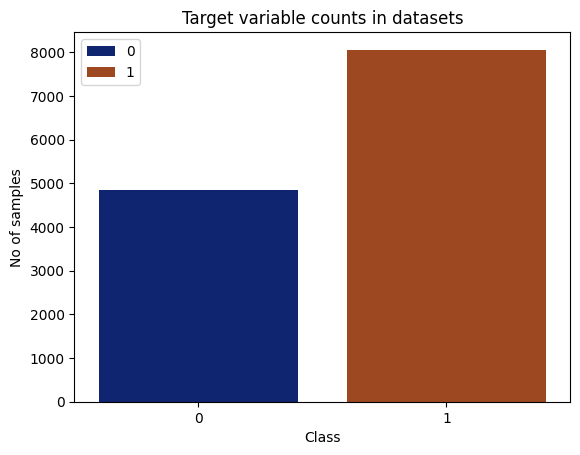

In [102]:
### Checking and plotting for the class in the target variable 
(unique, counts) = np.unique(selected_df['DiagPeriodL90D'], return_counts=True)
print(unique, counts)
sns.barplot(x=unique, y=counts, hue=unique, palette='dark', legend=True)
plt.xlabel("Class")
plt.ylabel("No of samples")
plt.xticks()
plt.title("Target variable counts in datasets")
plt.show()
plt.close() 

Number of samples in category 0: 4846
Number of samples in category 1: 8060


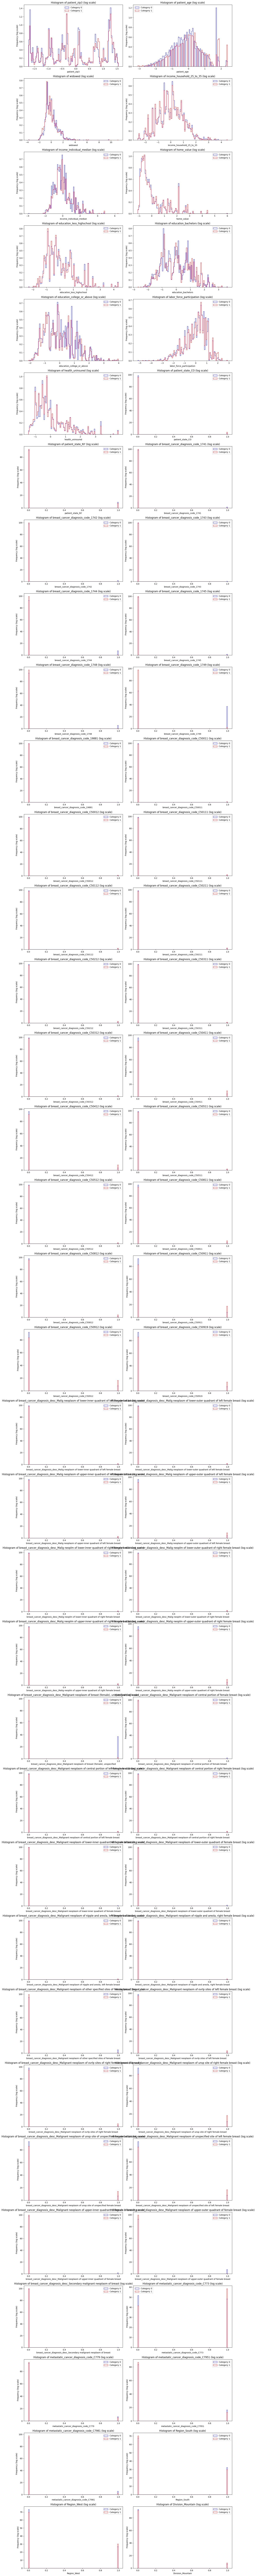

In [103]:
###Comparing the variables for the target categories using a histogram
# Split data based on categories
category_0 = selected_df[selected_df['DiagPeriodL90D'] == 0]
category_1 = selected_df[selected_df['DiagPeriodL90D'] == 1]

print("Number of samples in category 0:", len(category_0))
print("Number of samples in category 1:", len(category_1))

# Determining the number of columns and rows based on the number of features
num_features = len(selected_df.columns[:-1])
num_rows = (num_features + 1) // 2

# Creating subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5*num_rows))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Plot histograms for each feature
for i, feature in enumerate(selected_df.columns[:-1]):
    ax = axes[i]
    ax.hist(category_0[feature], bins=100, histtype="step", color="blue", label="Category 0", density=True)
    ax.hist(category_1[feature], bins=100, histtype="step", color="red", label="Category 1", density=True)
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency (log scale)')
    ax.set_title('Histogram of {} (log scale)'.format(feature))
    ax.legend()

# Hide unused subplots
for i in range(num_features, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [156]:
#### Balancing my target variable avoid baises in the model
from sklearn.utils import resample

# Splitting majority and minority classes
minority_class = selected_df[selected_df['DiagPeriodL90D'] == 0]
majority_class = selected_df[selected_df['DiagPeriodL90D'] == 1]

# Downsampling the majority class
majority_downsampled = resample(majority_class,
                                replace=False,    
                                n_samples=len(minority_class),  # Matching the minority class size
                                random_state=42) 

# Combining the minority class with downsampled majority class
balanced_df = pd.concat([minority_class, majority_downsampled])

# Displaying the new class counts
balanced_df['DiagPeriodL90D'].value_counts()

DiagPeriodL90D
0    4846
1    4846
Name: count, dtype: int64

Accuracy: 0.7581227436823105
Precision: 0.680334092634776
Recall: 0.9491525423728814
F1-score: 0.7925696594427245


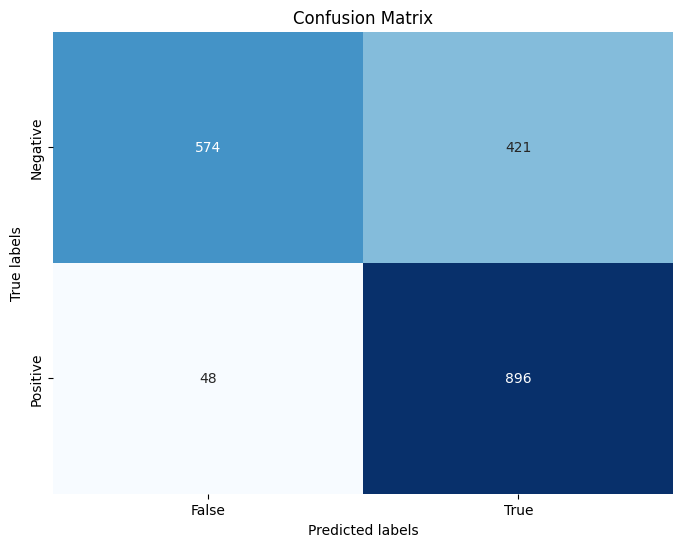

In [157]:
#### model training - Logistics Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Initialize the dataset
X = balanced_df.drop(columns=['DiagPeriodL90D'])  # Features for training data
y = balanced_df['DiagPeriodL90D']  # Target variable for training data

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the machine learning model
model = LogisticRegression(max_iter = 1000)
model.fit(X_train, y_train)

# Predicting the target variable for the test set
y_pred = model.predict(X_test)

# Evaluate model's performance using accuracy, precision, recall, and F1-score, cross-validation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print  accuracy, precision, recall, F1-score
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

# Creating a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
class_labels = ["Negative", "Positive"]
predicted_labels = ["False", "True"]

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=predicted_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

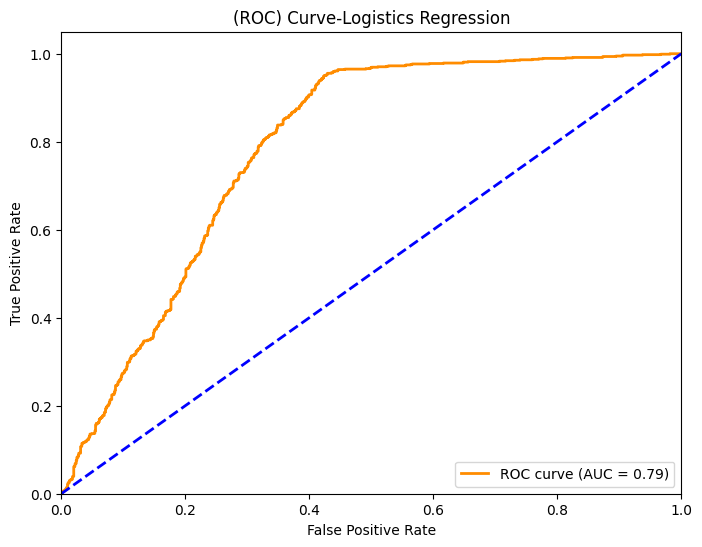

In [158]:
from sklearn.metrics import roc_curve, roc_auc_score
# Predict probabilities for the positive class
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute AUC score
auc_score = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve-Logistics Regression')
plt.legend(loc="lower right")
plt.show()

Accuracy: 0.7266632284682826
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.62      0.70       995
           1       0.68      0.84      0.75       944

    accuracy                           0.73      1939
   macro avg       0.74      0.73      0.72      1939
weighted avg       0.74      0.73      0.72      1939



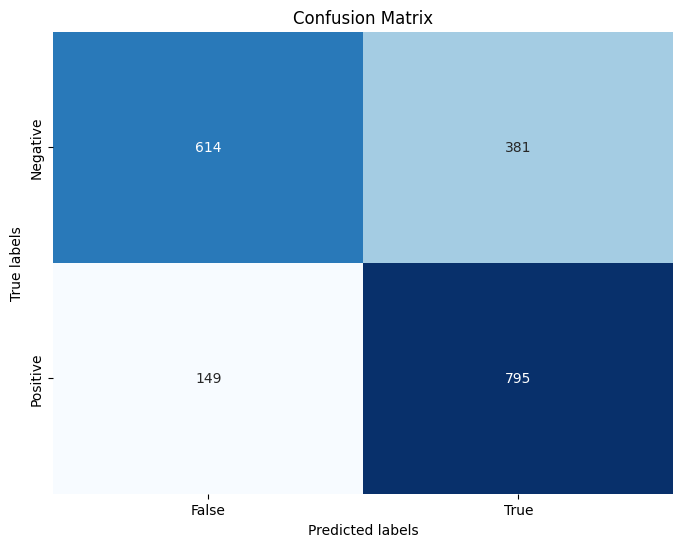

In [159]:
### Another model Gradient booosting - XGBoost 
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming X contains your features and y contains your target variable

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Setting XGBoost parameters
params = {
    'objective': 'binary:logistic',  # Binary classification
    'eval_metric': 'error'            # Evaluation metric: classification error
}

# Training the model
num_round = 100  # Number of boosting rounds
xgb_model = xgb.train(params, dtrain, num_round)

# Making predictions on the test data
y_pred = xgb_model.predict(dtest)
y_pred_binary = [round(value) for value in y_pred]  # Converting probabilities to binary predictions

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_binary))

# Creating a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
class_labels = ["Negative", "Positive"]
predicted_labels = ["False", "True"]

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=predicted_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

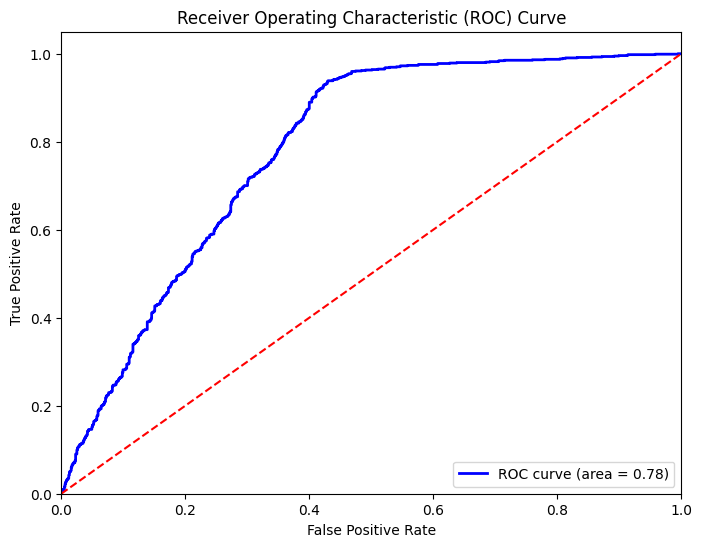

In [160]:
### Roc curve 
from sklearn.metrics import roc_curve, auc
# Getting predicted probabilities for the test set
y_pred_proba = xgb_model.predict(dtest)

# Calculating false positive rate (FPR) and true positive rate (TPR) for different thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculating the area under the ROC curve (AUC)
auc_score  = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# **Applying my machine learning model to the test. csv file**

In [161]:
test_df = pd.read_csv('test.csv')
test_df.head(5)

patient_id patient_race          payer_type patient_state  patient_zip3  \
0      573710        White            MEDICAID            IN           467   
1      593679          NaN          COMMERCIAL            FL           337   
2      184532     Hispanic            MEDICAID            CA           917   
3      447383     Hispanic  MEDICARE ADVANTAGE            CA           917   
4      687972        Black                 NaN            CA           900   

   patient_age patient_gender   bmi breast_cancer_diagnosis_code  \
0           54              F   NaN                       C50412   
1           52              F   NaN                       C50912   
2           61              F   NaN                       C50911   
3           64              F   NaN                       C50912   
4           40              F  23.0                       C50412   

                        breast_cancer_diagnosis_desc  ...   hispanic  \
0  Malig neoplasm of upper-outer quadrant of left...  ...   3.564516   
1  Malignant neoplasm of unspecified site of left...  ...  10.261538   
2  Malignant neoplasm of unsp site of right femal...  ...  47.726087   
3  Malignant neoplasm of unspecified site of left...  ...  47.726087   
4  Malig neoplasm of upper-outer quadrant of left...  ...  45.526154   

    disabled    poverty limited_english commute_time  health_uninsured  \
0  13.996774   7.985484        0.969355    24.955357         10.838710   
1  16.020513  13.602564        2.836842    23.952632         10.579487   
2   9.895652  10.515217       12.745652    32.530435          7.263043   
3   9.895652  10.515217       12.745652    32.530435          7.263043   
4  11.901538  20.760000       14.737500    30.709375         10.341538   

    veteran      Ozone       PM25        N02  
0  8.080645  38.724876   7.947165  11.157161  
1  9.302564  36.918257   7.838973  13.599985  
2  3.810870  47.310325   9.595719  20.084231  
3  3.810870  47.310325   9.595719  20.084231  
4  3.030769  41.186992  11.166898  21.644261  

[5 rows x 82 columns]

In [162]:
test_df.shape

(5792, 82)

In [163]:
test_df.dtypes

patient_id            int64
patient_race         object
payer_type           object
patient_state        object
patient_zip3          int64
                     ...   
health_uninsured    float64
veteran             float64
Ozone               float64
PM25                float64
N02                 float64
Length: 82, dtype: object

In [164]:
##Checking for missing data
missing_data =test_df.isnull().sum()
print("Missing data:\n", missing_data)

Missing data:
 patient_id             0
patient_race        2901
payer_type           760
patient_state         21
patient_zip3           0
                    ... 
health_uninsured       0
veteran                0
Ozone                 14
PM25                  14
N02                   14
Length: 82, dtype: int64


In [165]:
### Preprocessing my test_df
# Handling for missing numerical data 
for col in test_df.select_dtypes(include=['number']).columns:
    test_df[col] = test_df[col].fillna(test_df[col].median())
## Handling for missing categorical data
for col in test_df.select_dtypes(include=['object']).columns:
    test_df[col] =test_df[col].fillna(test_df[col].mode()[0])

In [166]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5792 entries, 0 to 5791
Data columns (total 82 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   patient_id                             5792 non-null   int64  
 1   patient_race                           5792 non-null   object 
 2   payer_type                             5792 non-null   object 
 3   patient_state                          5792 non-null   object 
 4   patient_zip3                           5792 non-null   int64  
 5   patient_age                            5792 non-null   int64  
 6   patient_gender                         5792 non-null   object 
 7   bmi                                    5792 non-null   float64
 8   breast_cancer_diagnosis_code           5792 non-null   object 
 9   breast_cancer_diagnosis_desc           5792 non-null   object 
 10  metastatic_cancer_diagnosis_code       5792 non-null   object 
 11  meta

In [167]:
test_df.head(5)

patient_id patient_race          payer_type patient_state  patient_zip3  \
0      573710        White            MEDICAID            IN           467   
1      593679        White          COMMERCIAL            FL           337   
2      184532     Hispanic            MEDICAID            CA           917   
3      447383     Hispanic  MEDICARE ADVANTAGE            CA           917   
4      687972        Black          COMMERCIAL            CA           900   

   patient_age patient_gender    bmi breast_cancer_diagnosis_code  \
0           54              F  28.15                       C50412   
1           52              F  28.15                       C50912   
2           61              F  28.15                       C50911   
3           64              F  28.15                       C50912   
4           40              F  23.00                       C50412   

                        breast_cancer_diagnosis_desc  ...   hispanic  \
0  Malig neoplasm of upper-outer quadrant of left...  ...   3.564516   
1  Malignant neoplasm of unspecified site of left...  ...  10.261538   
2  Malignant neoplasm of unsp site of right femal...  ...  47.726087   
3  Malignant neoplasm of unspecified site of left...  ...  47.726087   
4  Malig neoplasm of upper-outer quadrant of left...  ...  45.526154   

    disabled    poverty limited_english commute_time  health_uninsured  \
0  13.996774   7.985484        0.969355    24.955357         10.838710   
1  16.020513  13.602564        2.836842    23.952632         10.579487   
2   9.895652  10.515217       12.745652    32.530435          7.263043   
3   9.895652  10.515217       12.745652    32.530435          7.263043   
4  11.901538  20.760000       14.737500    30.709375         10.341538   

    veteran      Ozone       PM25        N02  
0  8.080645  38.724876   7.947165  11.157161  
1  9.302564  36.918257   7.838973  13.599985  
2  3.810870  47.310325   9.595719  20.084231  
3  3.810870  47.310325   9.595719  20.084231  
4  3.030769  41.186992  11.166898  21.644261  

[5 rows x 82 columns]

In [168]:
###Checking for duplicates
duplicates = test_df.duplicated().sum()
print("Number of Duplicate:", duplicates)

Number of Duplicate: 0


In [169]:
## Checking for Invalid entries for the df 
invalid_entries=test_df[test_df.select_dtypes(include=['number'])<0].count()
print("Invalid Entries:\n", invalid_entries)

Invalid Entries:
 patient_id          0
patient_race        0
payer_type          0
patient_state       0
patient_zip3        0
                   ..
health_uninsured    0
veteran             0
Ozone               0
PM25                0
N02                 0
Length: 82, dtype: int64


In [170]:
### Extracting my test ID colums
test_ID = test_df['patient_id']
### Dropping the id column
test_df0 = test_df.drop(["patient_id"], axis = 1)

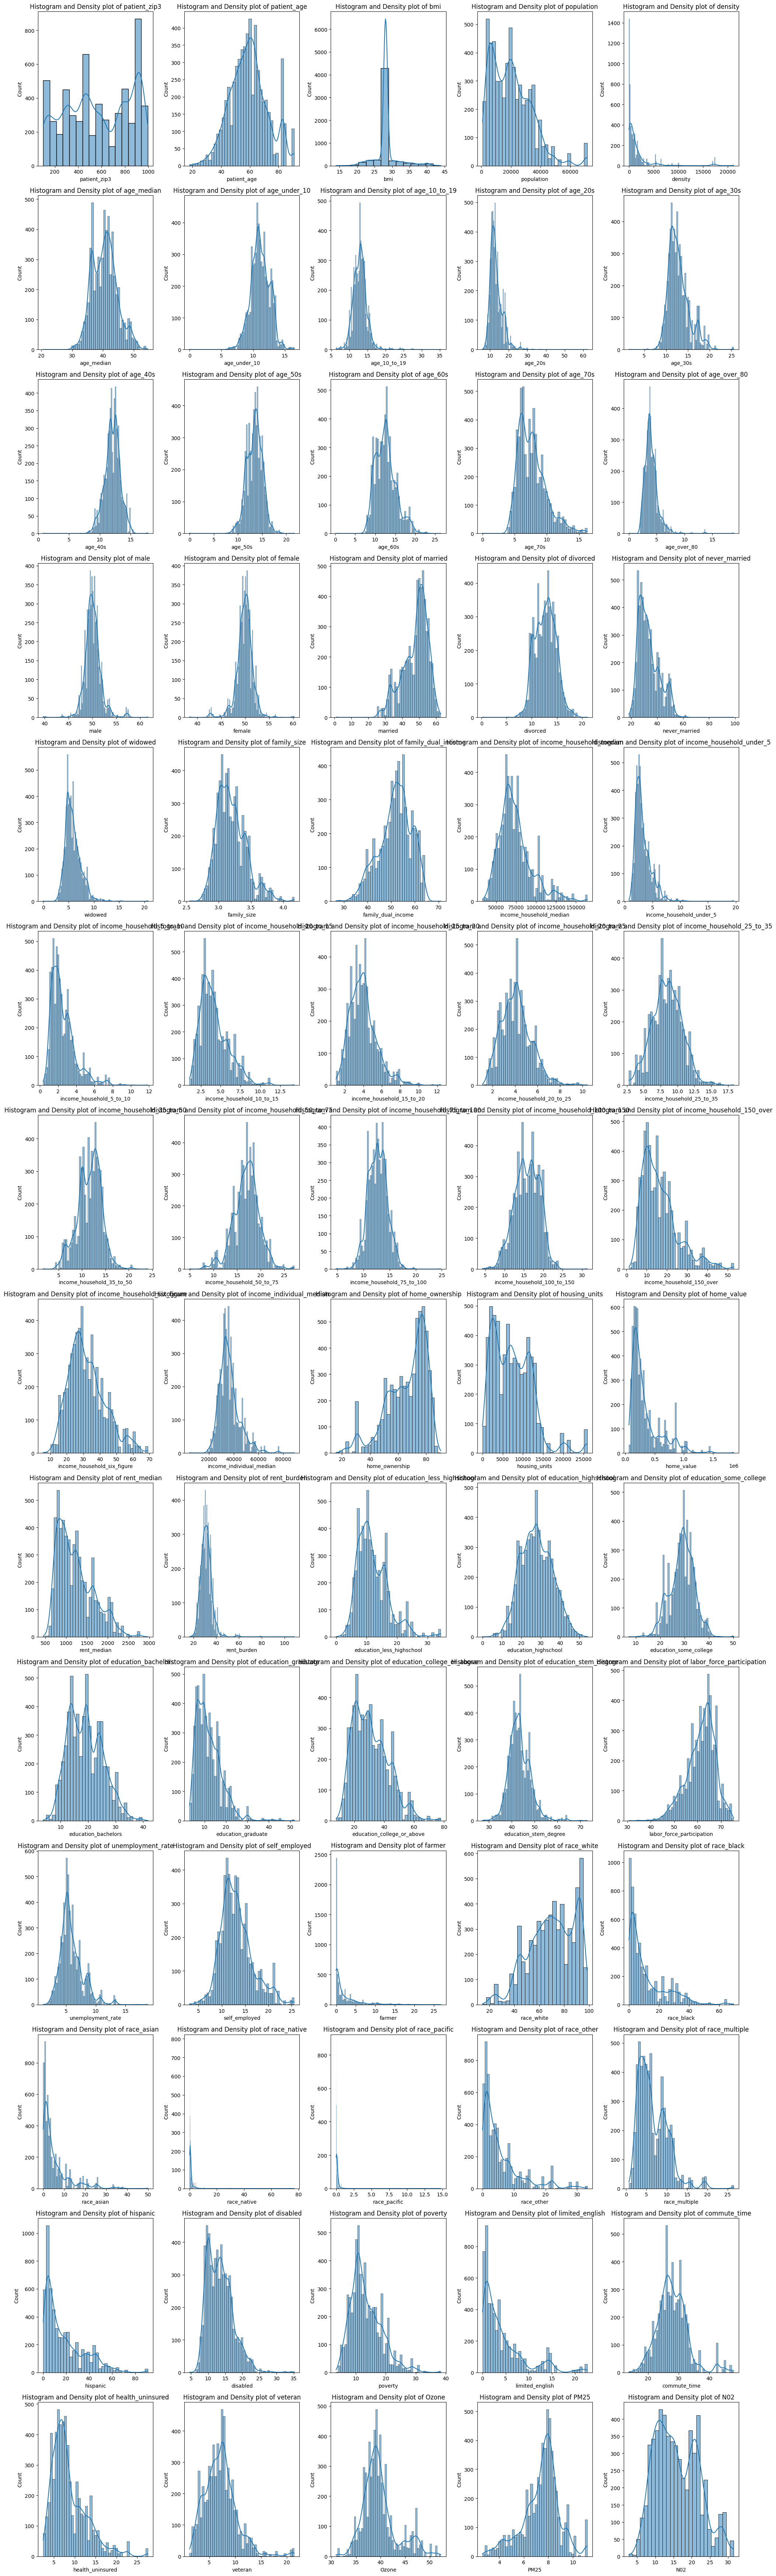

In [171]:
### Plotting a histogram 
numerical_cols = test_df0.select_dtypes(include=['number']).columns
num_cols = 5  # Number of columns in the grid
num_rows = -(-len(numerical_cols) // num_cols)  # Ceiling division to calculate number of rows

# Creating subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5*num_rows))

# Flattening the axes if there's only one row
if num_rows == 1:
    axes = [axes]

# Plotting the histograms
for i, col in enumerate(numerical_cols):
    row_index = i // num_cols  # Calculating row index
    col_index = i % num_cols   # Calculating column index
    sns.histplot(test_df0[col], kde=True, ax=axes[row_index][col_index])
    axes[row_index][col_index].set_title(f"Histogram and Density plot of {col}")

# Hiding empty subplots if there are any
for ax in axes.flat[len(numerical_cols):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

In [172]:
### Handling outliers with log transformation
numeric_cols = test_df0.select_dtypes(include=['number']).columns
for col in numeric_cols:
    test_df0[col] = np.log1p(test_df0[col])

In [173]:
### One Hot Encoding
### Listing out the categorical variables
categorical_cols = test_df0.select_dtypes(exclude=['number']).columns
print("Number of categorical columns:", len(categorical_cols))
print("Categorical column names:", categorical_cols)

Number of categorical columns: 11
Categorical column names: Index(['patient_race', 'payer_type', 'patient_state', 'patient_gender',
       'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc',
       'metastatic_cancer_diagnosis_code', 'metastatic_first_novel_treatment',
       'metastatic_first_novel_treatment_type', 'Region', 'Division'],
      dtype='object')


In [174]:
test_df0.shape

(5792, 81)

In [175]:
### OneHot Endcoding
ohe = OneHotEncoder(handle_unknown='ignore',
                    sparse_output= False).set_output(transform='pandas')

In [176]:
ohetransform = ohe.fit_transform(test_df0[['patient_race', 'payer_type', 'patient_state', 'patient_gender',
       'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc',
       'metastatic_cancer_diagnosis_code', 'metastatic_first_novel_treatment',
       'metastatic_first_novel_treatment_type', 'Region', 'Division']])
ohetransform

patient_race_Asian  patient_race_Black  patient_race_Hispanic  \
0                    0.0                 0.0                    0.0   
1                    0.0                 0.0                    0.0   
2                    0.0                 0.0                    1.0   
3                    0.0                 0.0                    1.0   
4                    0.0                 1.0                    0.0   
...                  ...                 ...                    ...   
5787                 0.0                 0.0                    0.0   
5788                 0.0                 0.0                    0.0   
5789                 0.0                 0.0                    0.0   
5790                 0.0                 0.0                    0.0   
5791                 0.0                 0.0                    1.0   

      patient_race_Other  patient_race_White  payer_type_COMMERCIAL  \
0                    0.0                 1.0                    0.0   
1                    0.0                 1.0                    1.0   
2                    0.0                 0.0                    0.0   
3                    0.0                 0.0                    0.0   
4                    0.0                 0.0                    1.0   
...                  ...                 ...                    ...   
5787                 0.0                 1.0                    1.0   
5788                 0.0                 1.0                    1.0   
5789                 0.0                 1.0                    0.0   
5790                 0.0                 1.0                    1.0   
5791                 0.0                 0.0                    0.0   

      payer_type_MEDICAID  payer_type_MEDICARE ADVANTAGE  patient_state_AK  \
0                     1.0                            0.0               0.0   
1                     0.0                            0.0               0.0   
2                     1.0                            0.0               0.0   
3                     0.0                            1.0               0.0   
4                     0.0                            0.0               0.0   
...                   ...                            ...               ...   
5787                  0.0                            0.0               0.0   
5788                  0.0                            0.0               0.0   
5789                  0.0                            1.0               0.0   
5790                  0.0                            0.0               0.0   
5791                  0.0                            1.0               0.0   

      patient_state_AL  ...  Region_West  Division_East North Central  \
0                  0.0  ...          0.0                          1.0   
1                  0.0  ...          0.0                          0.0   
2                  0.0  ...          1.0                          0.0   
3                  0.0  ...          1.0                          0.0   
4                  0.0  ...          1.0                          0.0   
...                ...  ...          ...                          ...   
5787               0.0  ...          0.0                          0.0   
5788               0.0  ...          0.0                          0.0   
5789               0.0  ...          1.0                          0.0   
5790               0.0  ...          0.0                          0.0   
5791               0.0  ...          0.0                          0.0   

      Division_East South Central  Division_Middle Atlantic  \
0                             0.0                       0.0   
1                             0.0                       0.0   
2                             0.0                       0.0   
3                             0.0                       0.0   
4                             0.0                       0.0   
...                           ...                       ...   
5787                          1.0            

In [177]:
### Combining the datasets 
df_en = pd.concat([test_df0, ohetransform], axis=1).drop(columns = ['patient_race', 'payer_type', 'patient_state', 'patient_gender',
       'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc',
       'metastatic_cancer_diagnosis_code', 'metastatic_first_novel_treatment',
       'metastatic_first_novel_treatment_type', 'Region', 'Division'])

In [178]:
df_en.head()

patient_zip3  patient_age       bmi  population   density  age_median  \
0      6.148468     4.007333  3.372455    8.601982  4.461542    3.734816   
1      5.823046     3.970292  3.372455    9.884041  7.349943    3.914175   
2      6.822197     4.127134  3.372455   10.669688  7.625389    3.685177   
3      6.822197     4.174387  3.372455   10.669688  7.625389    3.685177   
4      6.803505     3.713572  3.178054   10.492804  8.574581    3.628435   

   age_under_10  age_10_to_19   age_20s   age_30s  ...  Region_West  \
0      2.619748      2.713947  2.456137  2.535743  ...          0.0   
1      2.204887      2.260427  2.458273  2.509808  ...          0.0   
2      2.510129      2.631732  2.716133  2.676395  ...          1.0   
3      2.510129      2.631732  2.716133  2.676395  ...          1.0   
4      2.375979      2.506969  2.903280  2.914606  ...          1.0   

   Division_East North Central  Division_East South Central  \
0                          1.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   Division_Middle Atlantic  Division_Mountain  Division_New England  \
0                       0.0                0.0                   0.0   
1                       0.0                0.0                   0.0   
2                       0.0                0.0                   0.0   
3                       0.0                0.0                   0.0   
4                       0.0                0.0                   0.0   

   Division_Pacific  Division_South Atlantic  Division_West North Central  \
0               0.0                      0.0                          0.0   
1               0.0                      1.0                          0.0   
2               1.0                      0.0                          0.0   
3               1.0                      0.0                          0.0   
4               1.0                      0.0                          0.0   

   Division_West South Central  
0                          0.0  
1                          0.0  
2                          0.0  
3                          0.0  
4                          0.0  

[5 rows x 269 columns]

In [179]:
#### Selecting relevant features from my training df and applying that here
#And I used chatgtp because typing out the features would have been tedious and just easier
selected_features = ['patient_zip3', 'patient_age', 'widowed', 'income_household_25_to_35',
                     'income_individual_median', 'home_value', 'education_less_highschool',
                     'education_bachelors', 'education_college_or_above',
                     'labor_force_participation', 'health_uninsured', 'patient_state_CO',
                     'patient_state_NY', 'breast_cancer_diagnosis_code_1741',
                     'breast_cancer_diagnosis_code_1742',
                     'breast_cancer_diagnosis_code_1743',
                     'breast_cancer_diagnosis_code_1744',
                     'breast_cancer_diagnosis_code_1745',
                     'breast_cancer_diagnosis_code_1748',
                     'breast_cancer_diagnosis_code_1749',
                     'breast_cancer_diagnosis_code_19881',
                     'breast_cancer_diagnosis_code_C50011',
                     'breast_cancer_diagnosis_code_C50012',
                     'breast_cancer_diagnosis_code_C50111',
                     'breast_cancer_diagnosis_code_C50112',
                     'breast_cancer_diagnosis_code_C50211',
                     'breast_cancer_diagnosis_code_C50212',
                     'breast_cancer_diagnosis_code_C50311',
                     'breast_cancer_diagnosis_code_C50312',
                     'breast_cancer_diagnosis_code_C50411',
                     'breast_cancer_diagnosis_code_C50412',
                     'breast_cancer_diagnosis_code_C50511',
                     'breast_cancer_diagnosis_code_C50512',
                     'breast_cancer_diagnosis_code_C50811',
                     'breast_cancer_diagnosis_code_C50812',
                     'breast_cancer_diagnosis_code_C50911',
                     'breast_cancer_diagnosis_code_C50912',
                     'breast_cancer_diagnosis_code_C50919',
                     'breast_cancer_diagnosis_desc_Malig neoplasm of lower-inner quadrant of left female breast',
                     'breast_cancer_diagnosis_desc_Malig neoplasm of lower-outer quadrant of left female breast',
                     'breast_cancer_diagnosis_desc_Malig neoplasm of upper-inner quadrant of left female breast',
                     'breast_cancer_diagnosis_desc_Malig neoplasm of upper-outer quadrant of left female breast',
                     'breast_cancer_diagnosis_desc_Malig neoplm of lower-inner quadrant of right female breast',
                     'breast_cancer_diagnosis_desc_Malig neoplm of lower-outer quadrant of right female breast',
                     'breast_cancer_diagnosis_desc_Malig neoplm of upper-inner quadrant of right female breast',
                     'breast_cancer_diagnosis_desc_Malig neoplm of upper-outer quadrant of right female breast',
                     'breast_cancer_diagnosis_desc_Malignant neoplasm of breast (female), unspecified',
                     'breast_cancer_diagnosis_desc_Malignant neoplasm of central portion of female breast',
                     'breast_cancer_diagnosis_desc_Malignant neoplasm of central portion of left female breast',
                     'breast_cancer_diagnosis_desc_Malignant neoplasm of central portion of right female breast',
                     'breast_cancer_diagnosis_desc_Malignant neoplasm of lower-inner quadrant of female breast',
                     'breast_cancer_diagnosis_desc_Malignant neoplasm of lower-outer quadrant of female breast',
                     'breast_cancer_diagnosis_desc_Malignant neoplasm of nipple and areola, left female breast',
                     'breast_cancer_diagnosis_desc_Malignant neoplasm of nipple and areola, right female breast',
                     'breast_cancer_diagnosis_desc_Malignant neoplasm of other specified sites of female breast',
                     'breast_cancer_diagnosis_desc_Malignant neoplasm of ovrlp sites of left female breast',
                     'breast_cancer_diagnosis_desc_Malignant neoplasm of ovrlp sites of right female breast',
                     'breast_cancer_diagnosis_desc_Malignant neoplasm of unsp site of right female breast',
                     'breast_cancer_diagnosis_desc_Malignant neoplasm of unsp site of unspecified female breast',
                     'breast_cancer_diagnosis_desc_Malignant neoplasm of unspecified site of left female breast',
                     'breast_cancer_diagnosis_desc_Malignant neoplasm of upper-inner quadrant of female breast',
                     'breast_cancer_diagnosis_desc_Malignant neoplasm of upper-outer quadrant of female breast',
                     'breast_cancer_diagnosis_desc_Secondary malignant neoplasm of breast',
                     'metastatic_cancer_diagnosis_code_C773',
                     'metastatic_cancer_diagnosis_code_C779',
                     'metastatic_cancer_diagnosis_code_C7951',
                     'metastatic_cancer_diagnosis_code_C7981', 'Region_South', 'Region_West',
                     'Division_Mountain']

In [180]:
# Selecting the specified features from the original dataframe
df_selected = df_en[selected_features]

In [181]:
df_selected.shape

(5792, 70)

In [182]:
df_selected.head()

patient_zip3  patient_age   widowed  income_household_25_to_35  \
0      6.148468     4.007333  2.026024                   2.658566   
1      5.823046     3.970292  2.231117                   2.336732   
2      6.822197     4.127134  1.786674                   2.034421   
3      6.822197     4.174387  1.786674                   2.034421   
4      6.803505     3.713572  1.752005                   2.179711   

   income_individual_median  home_value  education_less_highschool  \
0                 10.420924   11.936561                   2.597419   
1                 10.453907   12.490731                   2.238525   
2                 10.443449   13.257956                   2.917301   
3                 10.443449   13.257956                   2.917301   
4                 10.492784   13.680558                   3.174522   

   education_bachelors  education_college_or_above  labor_force_participation  \
0             2.556852                    2.941378                   4.163610   
1             3.139833                    3.579737                   4.061062   
2             3.054001                    3.453295                   4.161292   
3             3.054001                    3.453295                   4.161292   
4             3.214312                    3.652614                   4.180334   

   ...  \
0  ...   
1  ...   
2  ...   
3  ...   
4  ...   

   breast_cancer_diagnosis_desc_Malignant neoplasm of upper-inner quadrant of female breast  \
0                                                0.0                                          
1                                                0.0                                          
2                                                0.0                                          
3                                                0.0                                          
4                                                0.0                                          

   breast_cancer_diagnosis_desc_Malignant neoplasm of upper-outer quadrant of female breast  \
0                                                0.0                                          
1                                                0.0                                          
2                                                0.0                                          
3                                                0.0                                          
4                                                0.0                                          

   breast_cancer_diagnosis_desc_Secondary malignant neoplasm of breast  \
0                                                0.0                     
1                                                0.0                     
2                                                0.0                     
3                                                0.0                     
4                                                0.0                     

   metastatic_cancer_diagnosis_code_C773  \
0                                    1.0   
1                                    0.0   
2                                    1.0   
3                                    0.0   
4                                    0.0   

   metastatic_cancer_diagnosis_code_C779  \
0                                    0.0   
1                                    0.0   
2                                    0.0   
3                                    1.0   
4                                    1.0   

   metastatic_cancer_diagnosis_code_C7951  \
0                                     0.0   
1                                     0.0   
2                                     0.0   
3                                     0.0   
4                                     0.0   

   metastatic_cancer_diagnosis_code_C7981  Region_South  Region_West  \
0                                     0.0           0.0          0.0   
1                                     0.0           1.0          0.0   
2              

In [183]:
### Checking to see if the selected feature for the test.csv files matches the one from train.csv
# Get the columns of df_En
df_selected_columns = df_selected.columns

# Get the columns of selected_df
selected_df_columns = selected_df.columns

# Find the missing features
missing_features = set(selected_df_columns) - set(df_selected_columns)

# Print the missing features
print("Missing features in df_selected:")
for feature in missing_features:
    print(feature)

Missing features in df_selected:
DiagPeriodL90D


Due to not having access to what the correct prediction is supposed to look like, I can't make evaluation metrics, so I'm only able to display the distribution of the predicted label of the target variable made by the two models I used Logistics Regression and XGBoost, I need to submit my prediction to know how well I did the model did with the test dataset.

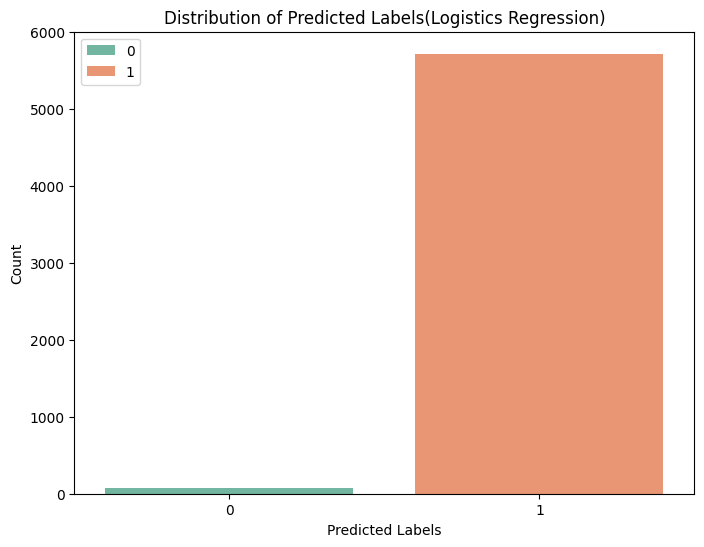

In [184]:
### Making predictions on the new dataset using the Logistics regression model 
y_pred_new = model.predict(df_selected)
# Visualizing the distribution of the predicted labels
plt.figure(figsize=(8, 6))
sns.countplot(x=y_pred_new, hue= y_pred_new, palette='Set2')
plt.title('Distribution of Predicted Labels(Logistics Regression)')
plt.xlabel('Predicted Labels')
plt.ylabel('Count')
plt.show()

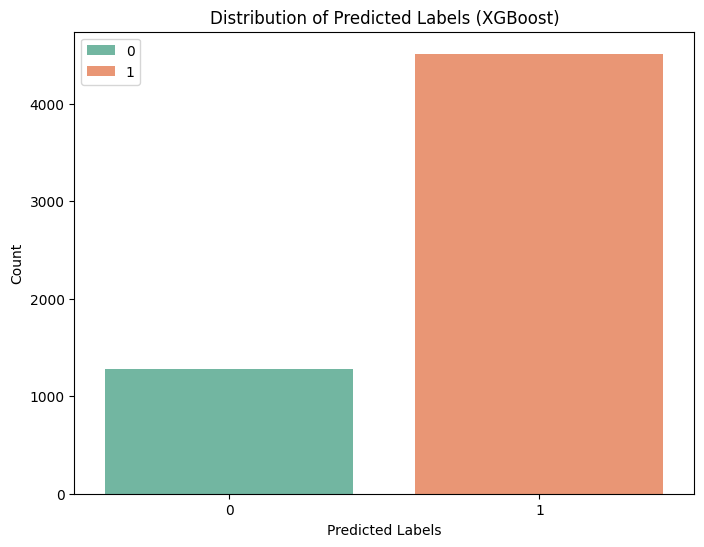

In [185]:
# Making predictions on the new dataset using XGBoost model
dnew = xgb.DMatrix(df_selected)
y_pred_new_xgb = xgb_model.predict(dnew)
y_pred_new_binary_xgb = [round(value) for value in y_pred_new_xgb]

# Visualizing the distribution of the predicted labels
plt.figure(figsize=(8, 6))
sns.countplot(x=y_pred_new_binary_xgb, hue=y_pred_new_binary_xgb,  palette='Set2')
plt.title('Distribution of Predicted Labels (XGBoost)')
plt.xlabel('Predicted Labels')
plt.ylabel('Count')
plt.show()

In this case, I'll be using the predicted label of the XGBoost, since It seems to have a lot less bais in the dataset.

In [191]:
#### Checking the lengths of test_ID and y_pred_new_binary_xgb
print(len(test_ID))
print(len(y_pred_new_binary_xgb))

5792
5792


In [192]:
### putting my model into a submission.csv
submission_df = pd.DataFrame({'patient_id': test_ID, 'DiagPeriodL90D_pred': y_pred_new_binary_xgb})
submission_df.to_csv('submission_xgb1.csv', index=False)

In [193]:
sub_df = pd.read_csv('submission_xgb1.csv')
sub_df.head(15)

patient_id  DiagPeriodL90D_pred
0       573710                    1
1       593679                    1
2       184532                    1
3       447383                    1
4       687972                    1
5       281312                    0
6       492714                    1
7       378266                    1
8       291550                    1
9       612272                    1
10      240105                    1
11      277939                    0
12      504153                    0
13      287269                    1
14      108727                    1